# Proyecto 1: Inteligencia Artificial Aplicada a la Ingeniería Eléctrica

## Algoritmo 1: K-means

In [21]:
# Importamos las librerías
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [2]:
# Importamos los datos del anexo A
csv_file = 'AnexoA.csv'
datosA = pd.read_csv(csv_file)
print(datosA.info())
print(datosA.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Empresa   133 non-null    object
 1   Circuito  133 non-null    object
 2   Abonados  133 non-null    int64 
 3   DPIR      133 non-null    int64 
 4   FPI       133 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 5.3+ KB
None
  Empresa             Circuito  Abonados  DPIR   FPI
0    CNFL       BARVA-CIPRESAL      3756  3273  2597
1    CNFL      CAJA-INDUSTRIAS      2230  2688  1423
2    CNFL      ESCAZÚ-PIEDADES      7039  2386  2446
3    CNFL    CORONADO-CASCAJAL      9777  2296  2682
4    CNFL  BRASIL-CIUDAD COLON      8644  2112  1852


In [3]:
# Importamos los datos del anexo b
csv_file = 'AnexoB.csv'
datosB = pd.read_csv(csv_file)
print(datosB.info())
print(datosB.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Empresa   352 non-null    object
 1   Circuito  352 non-null    object
 2   Abonados  352 non-null    int64 
 3   DPIR      352 non-null    int64 
 4   FPI       352 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 13.9+ KB
None
           Empresa             Circuito  Abonados  DPIR  FPI
0  COOPEALFARORUIZ         LAGUNA NORTE      3365   493  600
1  COOPEALFARORUIZ       ZARCERO CENTRO      1796   465  429
2  COOPEALFARORUIZ                 TORO       197   450  400
3  COOPEALFARORUIZ           SECTOR SUR      2762   344  400
4             CNFL  SABANILLA-SAN PEDRO      5933   564  324


In [69]:
# Análisis exploratorio gráfica de los datos


fig = px.scatter_3d(datosA, x="Abonados", y="DPIR", z="FPI", title="Datos Anexo A")
fig.update_traces(
    textfont=dict(
        family="Arial",
        size=18,
        color='red'  # Change this to your desired color
    ),
    marker=dict(
        size=5
        #color='rgba(135, 206, 250, 0.8)'  # Marker color
    )
)
fig.show()                        

In [70]:
# Análisis exploratorio gráfica de los datos
fig = px.scatter_3d(datosB, x="Abonados", y="DPIR", z="FPI", title="Datos Anexo B")
fig.update_traces(
    textfont=dict(
        family="Arial",
        size=18,
        color="crimson"  # Change this to your desired color
    ),
    marker=dict(
        size=5
        #color='rgba(135, 206, 250, 0.8)'  # Marker color
    )
)
fig.show()

In [6]:
data = datosA.select_dtypes(include=[int])
scaler = StandardScaler() #investigar qué hace
data = scaler.fit_transform(data)

### Método del codo

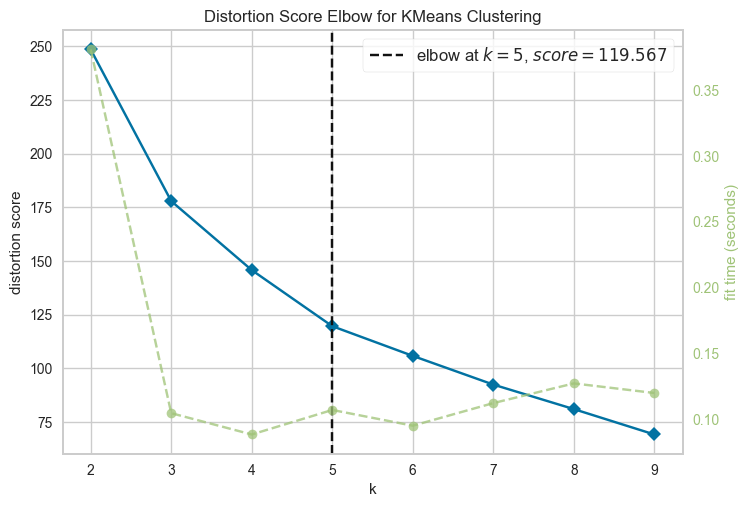

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()

Visualizamos que el gráfico no converge, sino que sigue bajando indefinidamente. Se elige k = 5 porque desde ese punto se percibe que los cambios sucesivos decrecen. Adicionalmente, la librería yellowbrick proporciona un gráfico que sugiere un valor de k adecuado.

### Coeficiente silueta

In [8]:
sc = {"Número de Clusters":[],
      "Coeficiente silueta":[]}

for k in range(2,9):# Maximum range should be 6, as it contains only 6 data points
      kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
      label = kmeans.labels_
      sil_coeff = silhouette_score(data,label,metric = 'euclidean')
      sc["Número de Clusters"].append(k)
      sc["Coeficiente silueta"].append(sil_coeff)

fig = px.line(sc, x="Número de Clusters", y="Coeficiente silueta",
             title="Método del Coeficiente silueta")

fig.show()

In [ ]:
# Elegimos k = 5 a partir de la gráfica
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit(data)
y_means = kmeans.predict(data).astype(str)
y_means = y_means.reshape(133,1)
centers = scaler.inverse_transform(kmeans.cluster_centers_) #quitamos escalamientos

data_kmeans =  datosA.copy()
data_kmeans["Cluster"]= y_means

In [97]:
fig = px.scatter_3d(dfK, x="Abonados", y="DPIR", z="FPI", color="Cluster", title='Clústers hechos con K-means')
fig.add_trace(go.Scatter3d(
    x=centers[:, 0],
    y=centers[:, 1],
    z=centers[:, 2],
    mode='markers',
    marker=dict(size=20, color='yellow'),
    name='Centroids'
))

fig.update_traces(
    textfont=dict(
        family="Arial",
        size=15,
        color="crimson"  
    ),
    marker=dict(
        size=5
    )
)
fig.show()

### Estadísticas

In [99]:
data_kmeans.groupby("Cluster").agg({"Abonados":['mean'],
                                    "DPIR":['mean'],
                                    "FPI":['mean'],
                                  "Empresa":[pd.Series.mode]})

,Abonados,DPIR,FPI,Empresa
,mean,mean,mean,mode
Cluster,,,,
0,12927.000000,965.416667,972.972222,"[CNFL, ICE]"
1,5230.473684,2183.710526,1472.552632,ICE
2,4201.918919,813.135135,803.513514,ICE
3,6526.357143,1528.357143,2567.500000,CNFL
4,2689.625000,3879.625000,2297.000000,ICE


## Algoritmo 2: DBSCAN

Mediante prueba y error se concluyó que los clusters del algoritmo DBSCAN convergen en 3, y la cantidad mínima de puntos que rodean a un core point necesaria para conseguirlo fue 7

In [104]:
dbscan = DBSCAN(eps=0.49, min_samples=7)
dbscan.fit(data)
data_DBSCAN = pd.DataFrame(datosA.copy()) #datos sin escalar
data_DBSCAN["Cluster"] = dbscan.labels_.astype(str).tolist()

In [105]:
#colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
#vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

fig = px.scatter_3d(data_DBSCAN, x="Abonados", y="DPIR", z="FPI", 
                    color="Cluster", title='Clústers hechos con DBSCAN')

fig.update_traces(
    textfont=dict(
        family="Arial",
        size=18,
        color="crimson"  # Change this to your desired color
    ),
    marker=dict(
        size=5
        #color='rgba(135, 206, 250, 0.8)'  # Marker color
    )
)
fig.show()

### Estadísticas

In [13]:
data_DBSCAN.groupby("Cluster").agg({"Abonados":['mean'],
                                    "DPIR":['mean'],
                                    "FPI":['mean'],
                                  "Empresa":[pd.Series.mode]})

,Abonados,DPIR,FPI,Empresa
,mean,mean,mean,mode
Cluster,,,,
-1,6685.254902,1701.519608,1432.901961,ICE
0,5085.588235,798.470588,868.647059,ICE
1,11724.000000,937.642857,1008.000000,CNFL
